In [1]:
#importing Libraries
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data.csv'
data = pd.read_csv(file_to_load)

In [3]:
#Getting the columns needed for the analysis
cleanedData = data.loc[:, ['Reported_Date', 'Description']]

In [4]:
#Converting reported date field to type datetime
cleanedData['Reported_Date'] = pd.to_datetime(cleanedData['Reported_Date'], errors='coerce')

In [5]:
#Getting the total number of crimes that took place in each month,
#got the code from https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
totalByMonth = cleanedData.groupby(cleanedData['Reported_Date'].dt.strftime('%B'))['Reported_Date'].count()

In [6]:
#Converting the series to a dataframe to make user friendly to work with
totalByMonth_df = pd.DataFrame(totalByMonth)

In [7]:
#sorting the dataframe to list the results in sorted manner,
#got the code from https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
         'November', 'December']
totalByMonth_df.index = pd.CategoricalIndex(totalByMonth_df.index, categories=months, ordered=True)
totalByMonth_df = totalByMonth_df.sort_index()

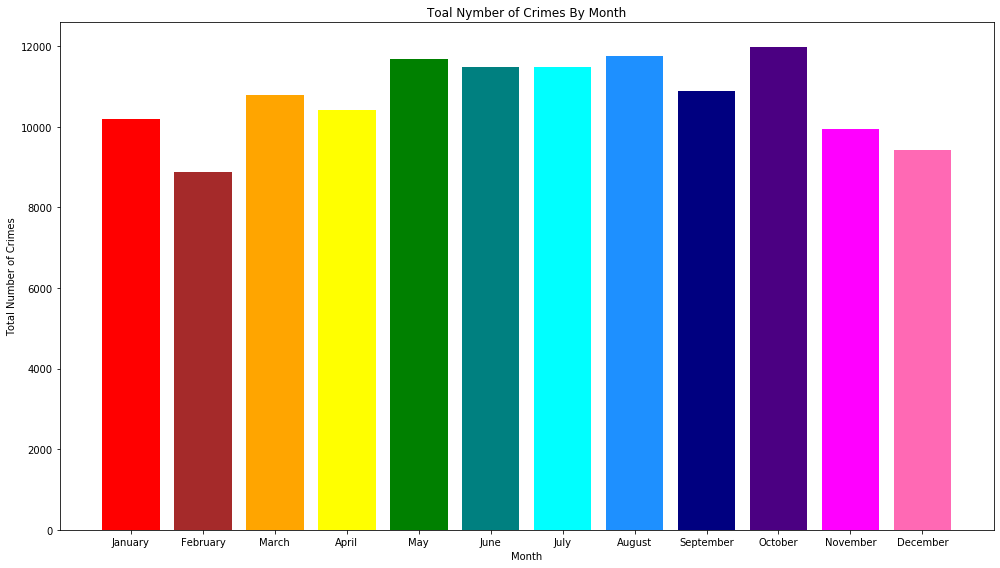

In [8]:
#Creating the plot to represent the data
colors =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'navy', 'indigo', 'magenta','hotpink']
fig, ax = plt.subplots(figsize=(14,8))
totalCrimes = plt.bar(x = totalByMonth_df.index, height= totalByMonth_df['Reported_Date'], color=colors)
plt.title("Toal Nymber of Crimes By Month")
plt.xlabel('Month')
plt.ylabel('Total Number of Crimes')
plt.tight_layout()
plt.show()